# 4. Rispondere alle domande
Trasforma le seguenti richiesti in formule per estrarre infromazioni dal dataframe
- Mostrami le vendite maggiori di 10

- Mostrami i dati del 2018

- Mostrami le vendite maggiori di 13 e l'anno è il 2018

- Mostrami tutto TRANNE i casi in cui le vendite sono maggiori di 13 e l'anno è il 2018

- Mostrami i dati dove le vendite divise per 3 sono maggiori di 3

- Mostrami i dipendenti i cui nomi sono alfabeticamente dopo la J



In [85]:
import pandas as pd


sales = pd.DataFrame(
    data={
        "employee": [
            "Katrina",
            "Guanyu",
            "Jan",
            "Roman",
            "Jacqueline",
            "Paola",
            "Esperanza",
            "Alaina",
            "Egweyn",
        ],
        "sales": [14, 17, 6, 12, 8, 3, 7, 15, 5],
        "year": [2018, 2019, 2020, 2018, 2020, 2019, 2019, 2020, 2020],
    }
)
sales
#sales.info()

#1-
sales["sales"][sales["sales"] > 10]

#2-
sales[sales["year"] == 2018]

#3-
sales[(sales["year"] == 2018 ) & (sales["sales"] > 13)]

#4-
sales[(sales["year"] !=2018) &( sales["sales"]<=13)]

#5-
sales[sales["sales"] / 3  > 3]

#6-
##sales["employee"].sort_values()[6:]
sales[sales["employee"].str[0] > "J"]


,employee,sales,year
0,Katrina,14,2018
3,Roman,12,2018
5,Paola,3,2019


# 5. Analisi di un dataset di video giochi
1. Quanti videogiochi sono stati pubblicati
2. Quali sono i generi più popolari? Mostralo con un bar plot
3. Plotta l'evoluzione del numero di giochi pubblicati nel tempo
4. Prova a riprodurre questo plot 
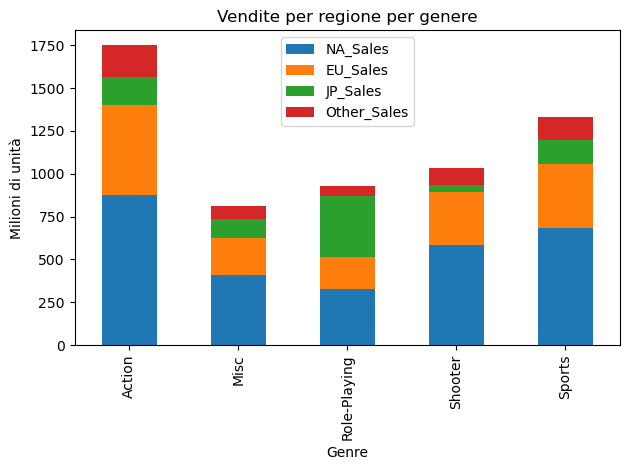


In [278]:
# Import dei pacchetti
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Caricamento del dataset
url = 'https://zenodo.org/record/5898311/files/vgsales.csv'
df = pd.read_csv(url)
df.head()

# df.info()
df.isna().sum()
# len(df.columns)

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [201]:
#1-
df.head()
df["Name"].nunique()

11493

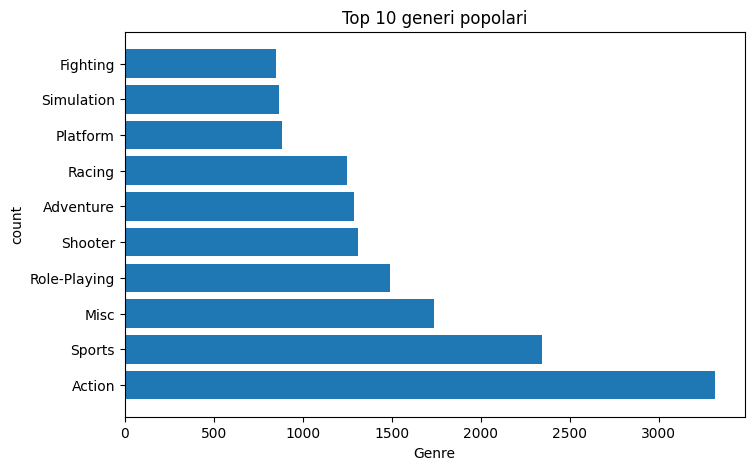

In [234]:
#2-
piu_popolari = df["Genre"].value_counts().sort_values(ascending=False).head(10)
piu_popolari
plt.figure(figsize=(8, 5))
plt.barh(piu_popolari.index, piu_popolari.values)
plt.xlabel("Genre")
plt.ylabel("count")
plt.title("Top 10 generi popolari")
plt.show()


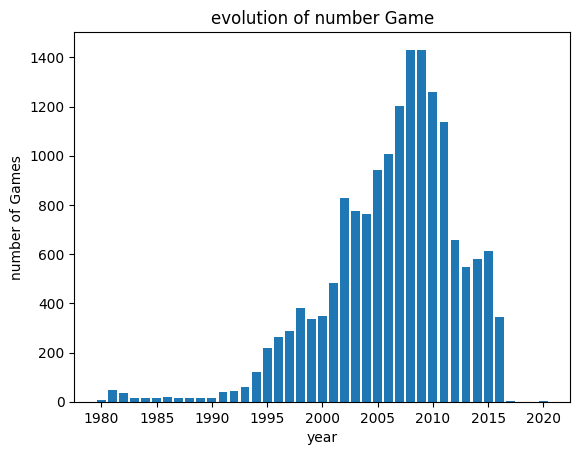

In [257]:
#3-
df.isna().sum()
anni = df["Year"].dropna().astype(int).value_counts().sort_index()
anni = anni.reset_index()
anni.columns = ["year", "count"]
anni
# df.head()
plt.bar(anni["year"], anni["count"])
plt.ylabel("number of Games")
plt.xlabel("year")
plt.title("evolution of number Game")
plt.show()

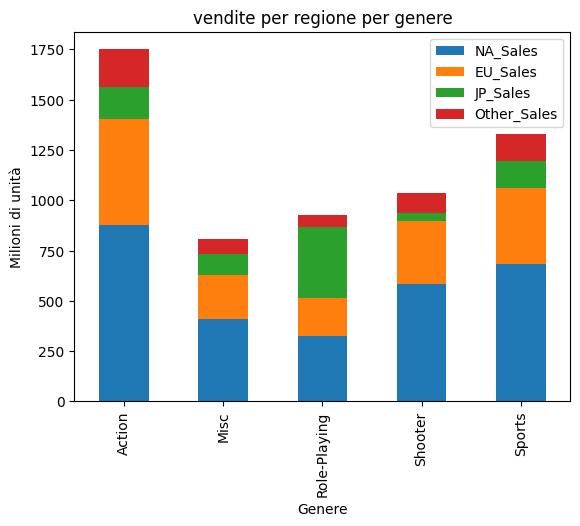

In [277]:
#4-
label = ['Action', 'Misc', 'Role-Playing', 'Shooter', 'Sports']
sales_by_genre = df.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
# print(sales_by_genre)
test = sales_by_genre.loc[label]
test
test.plot(kind= 'bar', stacked=True)
plt.xlabel("Genere")
plt.ylabel("Milioni di unità")
plt.title("vendite per regione per genere")
plt.show()

